34


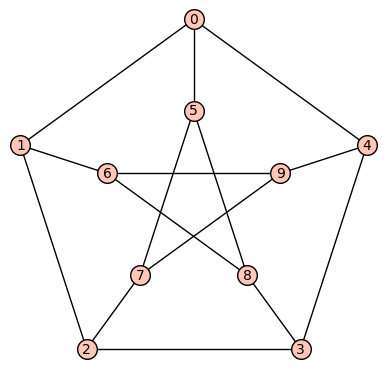

(None, None)

In [24]:
Sum = 0
    
def neighbors(G):

        #this function gives me the set of all neighbors of vertices in the graph.

    V = G.vertices()
    E = G.edges(labels=None)

    N = []
    for i in V:
        s=[]
        for j in V:
            if (i,j) in E or (j,i) in E:
                s.append(j)
        N.append(s)
    return N

from itertools import permutations
def Perm(G):

  #this function computes all permutations of the neighbors of each vertex i in {0,1,...,n} and returns them in 2-dim array.

    Permutations = []
    for i in range(len(neighbors(G))):
        perm = permutations(neighbors(G)[i])
        Permutations.append(list(perm))

    return Permutations


import random

def phi(S,x):
    #in permutation S = (0,1,...,n-1) we have phi(S,i) = i+1 (mod n).
    for i in range (0,len(S)-1):
        if S[i] == x:
            return S[i+1]
    for i in range (len(S)-1,len(S)):
        if S[i] == x:
            return S[0]


#G = graphs.FlowerSnark()
G = graphs.BlanusaSecondSnarkGraph()
#G = graphs.RandomRegularBipartite(12, 4, 3)

def is_good(G):
    V = G.vertices()
    E = G.edges(labels=None)

    e1 = E[0]
    Neighbor = Perm(G)
    random_perm = []
    for i in range (0,len(Neighbor)):
        ran = random.choice(Neighbor[i])
        random_perm.append(ran)

        #the following code privides me with a set of random edges chosen by local rotations.
    random_edges = [e1]
    for i in range (len(E)):
        v2 = phi(random_perm[e1[1]], e1[0])
        e2 = (e1[1],v2)
        random_edges.append(e2)
        e1 = e2
    
    

    good = True
    for (u,v) in random_edges: 
        if (v,u) in random_edges: 
            #print(u,v)
            good = False
            break
    return good
    
Sum = 0
for i in range (128):    
        #set of local rotations.
    G = graphs.PetersenGraph()
    if is_good(G):
        Sum = Sum + 1 
print(Sum), G.show()

In [39]:
T = []
for j in range (3000):
    Sum = 0
    for i in range (128):    
            #set of local rotations.
        G = graphs.PetersenGraph()
        if is_good(G):
            Sum = Sum + 1 
    T.append(Sum)
print(sum(T)//(len(T)))

31


In [42]:
M = []
for j in range (100):
    Sum = 0
    for i in range (4096):    
            #set of local rotations.
        H = graphs.BlanusaFirstSnarkGraph()
        if is_good(H):
            Sum = Sum + 1 
    M.append(Sum)
print(sum(M)//(len(M)))

702
